In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np
import tsne

In [3]:
data=pd.read_csv(r"C:\Users\naruk\OneDrive\Desktop\LR_Cust Data.csv")
data

,Clothing.ID,Age,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name
0,1080,34,5,1,4,General,Dresses
1,1077,60,3,0,0,General,Dresses
2,1080,49,2,0,4,General,Dresses
3,1077,24,5,1,0,General,Dresses
4,1077,34,5,1,0,General,Dresses
5,1077,53,3,0,14,General,Dresses
6,1095,39,5,1,2,General Petite,Dresses
7,1095,53,5,1,2,General Petite,Dresses
8,1077,50,3,1,1,General,Dresses
9,1120,32,5,1,0,General,Jackets


In [4]:
data["Division.Name"][data['Division.Name']=="General"]=1
data["Division.Name"][data['Division.Name']=="General Petite"]=0
data["Department.Name"][data["Department.Name"]=="Dresses"]=0
data["Department.Name"][data["Department.Name"]=="Jackets"]=1


C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naruk\Anac

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sample_data=sc.fit_transform(data)

## tsne

In [90]:
tsne_data=tsne.bh_sne(sample_data,max_iter=10000,perplexity=50)

In [91]:
tsne_data=pd.DataFrame(data=tsne_data,columns=("first","second"))

In [92]:
tsne_data['label']=data["Division.Name"]

In [93]:
import seaborn as sns

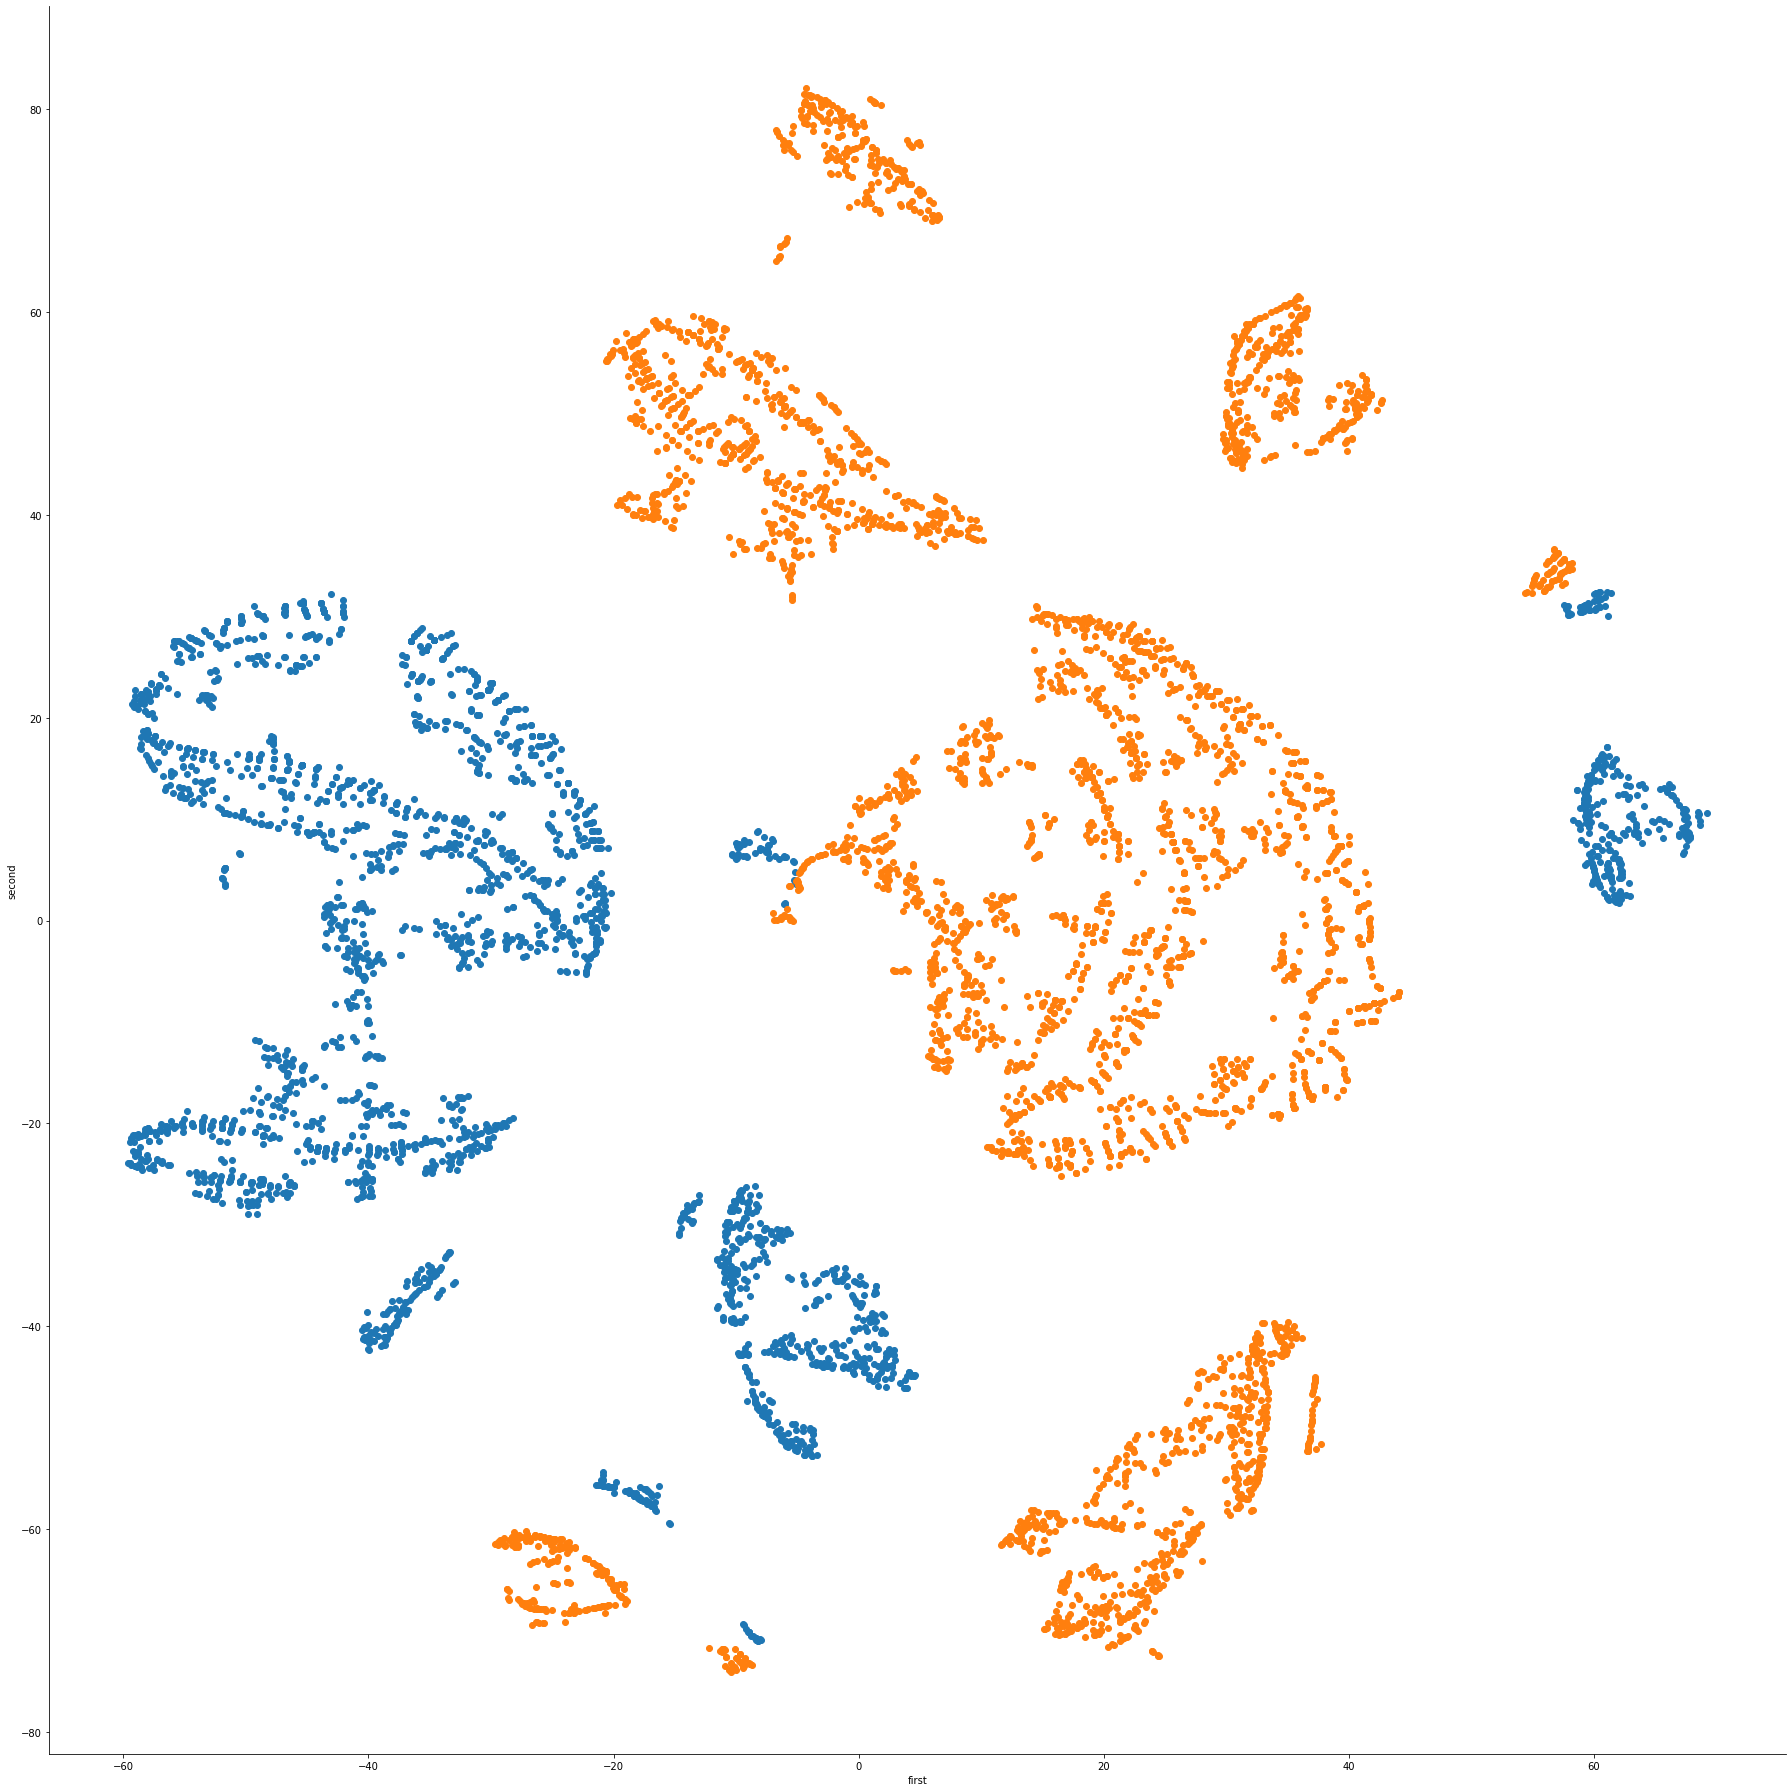

In [94]:
sns.FacetGrid(tsne_data,hue="label",height=25).map(plt.scatter,"first","second")

In [39]:
from sklearn.decomposition import PCA
pca=PCA()

In [53]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

In [54]:
pca_data=np.vstack((pca_data.T,data["Division.Name"])).T

In [55]:
pca_df=pd.DataFrame(data=pca_data,columns=("first","second","label"))

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
sns.FacetGrid(pca_df,hue="label",size=100).map(plt.scatter,'first','second')